# Educational Process Mining

https://archive-beta.ics.uci.edu/dataset/346/educational+process+mining+epm+a+learning+analytics+data+set

Educational Process Mining (EPM): A Learning Analytics Data Set. (2015). UCI Machine Learning Repository.

There are 6 sessions with student input data and two excel files with intermediate and final grades. This EDA explores Session 1 data and the grade output data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

### Load the data from github repository

In [2]:
inputs_path = 'https://raw.githubusercontent.com/lisaover/CMPINF2120_project/main/inputs_df.csv'
interim_path = 'https://raw.githubusercontent.com/lisaover/CMPINF2120_project/main/interim_df.csv'
final_path = 'https://raw.githubusercontent.com/lisaover/CMPINF2120_project/main/final_df.csv'
pts_path = 'https://raw.githubusercontent.com/lisaover/CMPINF2120_project/main/points_final.csv'

In [3]:
inputs_init = pd.read_csv(inputs_path)

In [4]:
interim_init = pd.read_csv(interim_path)

In [5]:
final_init = pd.read_csv(final_path)

In [6]:
pts_final_init = pd.read_csv(pts_path)

In [7]:
inputs_init.columns

Index(['Unnamed: 0', 'session', 'student_id', 'exercise', 'activity',
       'activity_grp', 'activity_ex', 'start_time', 'end_time', 'total_time',
       'idle_time', 'mouse_wheel', 'mouse_wheel_click', 'mouse_click_left',
       'mouse_click_right', 'mouse_movement', 'keystroke'],
      dtype='object')

In [8]:
interim_init.columns

Index(['Unnamed: 0', 'student_id', 'session_2', 'session_3', 'session_4',
       'session_5', 'session_6'],
      dtype='object')

In [9]:
final_init.columns

Index(['Unnamed: 0', 'student_id', 'Es_1_1', 'Es_1_2', 'Es_2_1', 'Es_2_2',
       'Es_3_1', 'Es_3_2', 'Es_3_3', 'Es_3_4', 'Es_3_5', 'Es_4_1', 'Es_4_2',
       'Es_5_1', 'Es_5_2', 'Es_5_3', 'Es_6_1', 'Es_6_2', 'final_score'],
      dtype='object')

In [10]:
pts_final_init.columns

Index(['Unnamed: 0', 'question', 'question_pts'], dtype='object')

##### Drop Unnamed columns

In [11]:
inputs_init.drop(columns=['Unnamed: 0'], axis=1, inplace=True)
interim_init.drop(columns=['Unnamed: 0'], axis=1, inplace=True)
final_init.drop(columns=['Unnamed: 0'], axis=1, inplace=True)
pts_final_init.drop(columns=['Unnamed: 0'], axis=1, inplace=True)

## Inputs

There are 14 columns:

* Four ID columns as type integer - session and student_id
* Five object columns, two should be dates - exercise, activity_grp, activity_ex, start_time, and end_time
* Seven integer columns - idle_time, mouse_wheel, mouse_wheel_click, mouse_click_left, mouse_click_right, mouse_movement, and keystoke

There are missing data only in the column `activity_ex` because it is a derived column from splitting the original `activity` column into two columns, one to hold the activity group and the other the exercise associated with the activity - not all activity was associated with a specific exercise.

There are 158 records where `idle_time` is negative. And, about 26% of the data has start and end times that are equal.

In [12]:
inputs_init.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227129 entries, 0 to 227128
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   session            227129 non-null  int64  
 1   student_id         227129 non-null  int64  
 2   exercise           227129 non-null  object 
 3   activity           227129 non-null  object 
 4   activity_grp       227129 non-null  object 
 5   activity_ex        111979 non-null  object 
 6   start_time         227129 non-null  object 
 7   end_time           227129 non-null  object 
 8   total_time         227129 non-null  float64
 9   idle_time          227129 non-null  int64  
 10  mouse_wheel        227129 non-null  int64  
 11  mouse_wheel_click  227129 non-null  int64  
 12  mouse_click_left   227129 non-null  int64  
 13  mouse_click_right  227129 non-null  int64  
 14  mouse_movement     227129 non-null  int64  
 15  keystroke          227129 non-null  int64  
dtypes:

In [13]:
inputs_init.isna().sum()

session                   0
student_id                0
exercise                  0
activity                  0
activity_grp              0
activity_ex          115150
start_time                0
end_time                  0
total_time                0
idle_time                 0
mouse_wheel               0
mouse_wheel_click         0
mouse_click_left          0
mouse_click_right         0
mouse_movement            0
keystroke                 0
dtype: int64

### Evaluate ID and date columns

In [14]:
inputs_init.session.nunique()

6

In [15]:
inputs_init.session.unique()

array([1, 2, 3, 4, 5, 6])

In [16]:
inputs_init.student_id.nunique()

113

In [17]:
inputs_init.student_id.unique()

array([  1,   2,   4,   5,   7,   9,  10,  11,  12,  14,  15,  17,  19,
        20,  21,  22,  28,  30,  32,  34,  36,  37,  38,  39,  42,  43,
        44,  46,  47,  49,  51,  52,  53,  54,  55,  56,  59,  62,  63,
        66,  67,  68,  70,  71,  73,  74,  76,  78,  79,  80,  81,  82,
        85,  86,  87,  88,  90,  91,  92,  93,  94,  96,  97,  98, 100,
       101, 102, 104, 105, 108, 109, 110, 111, 112, 113, 114,   3,   6,
         8,  16,  18,  24,  27,  29,  41,  48,  50,  61,  72,  83,  84,
        95,  99, 103,  23,  25,  31,  35,  45,  69,  75,  89, 106,  13,
        26,  33,  40,  57,  58,  60,  64,  65,  77])

##### Convert student_id and session to object type

In [18]:
inputs_init['student_id'] = inputs_init['student_id'].astype('object')
inputs_init['session'] = inputs_init['session'].astype('object')

##### Convert start_time and end_time to datetime type and add variable for the total time

The variable `idle_time` is the duration of idle time between the start and end times in milliseconds.

In [19]:
inputs_init['start_time'] = pd.to_datetime(inputs_init['start_time'])
inputs_init['end_time'] = pd.to_datetime(inputs_init['end_time'])

##### Check `idle_time` and `total_time` values

`idle_time` has 158 negative values.

`total_time` has one record with negative values because the start and end dates are reversed. ABout 26% of records have a `total_time` of 0 because the start and end times are equal.

In [20]:
inputs_init['idle_time'].describe()

count    2.271290e+05
mean    -1.873839e+09
std      4.528877e+11
min     -2.059092e+14
25%      0.000000e+00
50%      7.900000e+01
75%      5.719000e+03
max      7.244736e+09
Name: idle_time, dtype: float64

In [21]:
inputs_init.loc[inputs_init['idle_time'] < 0].shape[0]

158

In [22]:
inputs_init['total_time'].describe()

count    2.271290e+05
mean     1.585794e+04
std      6.111997e+04
min     -6.120000e+05
25%      0.000000e+00
50%      2.000000e+03
75%      9.000000e+03
max      3.861000e+06
Name: total_time, dtype: float64

In [23]:
inputs_init.loc[inputs_init['total_time'] < 0].shape[0]

1

In [24]:
inputs_init.loc[inputs_init['total_time'] < 0]

,session,student_id,exercise,activity,activity_grp,activity_ex,start_time,end_time,total_time,idle_time,mouse_wheel,mouse_wheel_click,mouse_click_left,mouse_click_right,mouse_movement,keystroke
137606,4,89,Es_4_5,Diagram,Diagram,NaN,2014-11-13 13:50:40,2014-11-13 13:40:28,-612000.0,30681,0,0,42,0,636,0


In [25]:
inputs_init.loc[inputs_init['start_time'] > inputs_init['end_time']]

,session,student_id,exercise,activity,activity_grp,activity_ex,start_time,end_time,total_time,idle_time,mouse_wheel,mouse_wheel_click,mouse_click_left,mouse_click_right,mouse_movement,keystroke
137606,4,89,Es_4_5,Diagram,Diagram,NaN,2014-11-13 13:50:40,2014-11-13 13:40:28,-612000.0,30681,0,0,42,0,636,0


In [26]:
chk = inputs_init.copy()

In [27]:
chk['zero_time'] = np.where(chk['start_time'] == chk['end_time'], 1, 0)

In [28]:
chk['zero_time'].mean()

0.26314121050152117

##### Change `idle_time` and `total_time` to float and assign NaN to negative values

In [29]:
inputs_init['idle_time'] = inputs_init['idle_time'].astype('float')
inputs_init['total_time'] = inputs_init['total_time'].astype('float')

In [30]:
inputs_init['idle_time'] = [x if x >= 0 else np.nan for x in inputs_init['idle_time']]

In [31]:
inputs_init['total_time'] = [x if x >= 0 else np.nan for x in inputs_init['total_time']]

In [32]:
inputs_init['idle_time'].describe()

count    2.269710e+05
mean     1.144022e+06
std      2.977009e+07
min      0.000000e+00
25%      0.000000e+00
50%      8.000000e+01
75%      5.740500e+03
max      7.244736e+09
Name: idle_time, dtype: float64

In [33]:
inputs_init['total_time'].describe()

count    2.271280e+05
mean     1.586071e+04
std      6.110590e+04
min      0.000000e+00
25%      0.000000e+00
50%      2.000000e+03
75%      9.000000e+03
max      3.861000e+06
Name: total_time, dtype: float64

##### Calculate `active_time` as difference between `total_time` and `idle_time`

In [34]:
chk['more_idle'] = np.where(chk['idle_time'] > chk['total_time'], 1, 0)

In [35]:
chk['more_idle'].mean()

0.23423693143543978

In [36]:
inputs_init['active_time'] = inputs_init['total_time'] - inputs_init['idle_time']

In [37]:
inputs_init['active_time'].describe()

count    2.269700e+05
mean    -1.128175e+06
std      2.973134e+07
min     -7.240875e+09
25%      0.000000e+00
50%      1.265000e+02
75%      2.000000e+03
max      3.738236e+06
Name: active_time, dtype: float64

In [38]:
inputs_init['active_time'] = [x if x >= 0 else np.nan for x in inputs_init['active_time']]

In [39]:
inputs_init['active_time'].describe()

count    1.737690e+05
mean     2.055835e+03
std      1.088817e+04
min      0.000000e+00
25%      0.000000e+00
50%      1.000000e+03
75%      2.859000e+03
max      3.738236e+06
Name: active_time, dtype: float64

### Evaluate categorical variables

In [40]:
inputs_init.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227129 entries, 0 to 227128
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   session            227129 non-null  object        
 1   student_id         227129 non-null  object        
 2   exercise           227129 non-null  object        
 3   activity           227129 non-null  object        
 4   activity_grp       227129 non-null  object        
 5   activity_ex        111979 non-null  object        
 6   start_time         227129 non-null  datetime64[ns]
 7   end_time           227129 non-null  datetime64[ns]
 8   total_time         227128 non-null  float64       
 9   idle_time          226971 non-null  float64       
 10  mouse_wheel        227129 non-null  int64         
 11  mouse_wheel_click  227129 non-null  int64         
 12  mouse_click_left   227129 non-null  int64         
 13  mouse_click_right  227129 non-null  int64   

In [41]:
inputs_init.exercise.nunique()

30

In [42]:
inputs_init.exercise.unique()

array(['Es', 'Es_1_1', 'Es_1_2', 'Es_1_4', 'Es_1_3', 'Es_2_1', 'Es_2_2',
       'Es_2_3', 'Es_2_4', 'Es_2_5', 'Es_2_6', 'Es_3_1', 'Es_3_2',
       'Es_3_3', 'Es_3_4', 'Es_4_1', 'Es_4_2', 'Es_4_3', 'Es_4_4',
       'Es_4_5', 'Es_5_2', 'Es_5_1', 'Es_5_3', 'Es_5_4', 'Es_6_1',
       'Es_6_2', 'Es_6_3', 'Es_6_4', 'Es_6_6', 'Es_6_5'], dtype=object)

In [43]:
inputs_init.activity.nunique()

99

In [44]:
inputs_init.activity_grp.unique()

array(['Other', 'Aulaweb', 'Blank', 'Deeds', 'Study', 'Properties',
       'Diagram', 'TextEditor', 'Study_Materials', 'Fsm_Related', 'FSM',
       'FSM_Related'], dtype=object)

In [45]:
inputs_init.activity_grp.nunique()

12

In [46]:
inputs_init.activity_grp.unique()

array(['Other', 'Aulaweb', 'Blank', 'Deeds', 'Study', 'Properties',
       'Diagram', 'TextEditor', 'Study_Materials', 'Fsm_Related', 'FSM',
       'FSM_Related'], dtype=object)

In [47]:
inputs_init.activity_grp.value_counts()

TextEditor         41900
Deeds              38000
Other              33009
Blank              23929
Study              21540
Diagram            20546
Properties         19419
FSM                17000
Aulaweb             8113
FSM_Related         3250
Study_Materials      398
Fsm_Related           25
Name: activity_grp, dtype: int64

In [48]:
inputs_init.activity_ex.nunique()

29

In [49]:
inputs_init.activity_ex.unique()

array([nan, 'Es_1_1', 'Es_1_2', 'Es_1_4', 'Es_3_1', 'Es_1_3', 'Es_4_1',
       'Es_4_2', 'Es_4_3', 'Es_4_4', 'Es_2_1', 'Es_2_2', 'Es_2_3',
       'Es_2_4', 'Es_2_5', 'Es_2_6', 'Es_3_2', 'Es_3_3', 'Es_3_4',
       'Es_4_5', 'Es_5_2', 'Es_5_1', 'Es_5_3', 'Es_5_4', 'Es_6_1',
       'Es_6_2', 'Es_6_3', 'Es_6_4', 'Es_6_6', 'Es_6_5'], dtype=object)

In [50]:
inputs_init.activity_ex.value_counts()

Es_6_3    10471
Es_6_2     8356
Es_6_1     7105
Es_4_5     6812
Es_5_4     6671
Es_3_2     6094
Es_2_2     5665
Es_5_1     4790
Es_1_2     4752
Es_5_3     4484
Es_2_4     4454
Es_3_1     4340
Es_1_1     4325
Es_2_1     4318
Es_1_3     3491
Es_2_3     3209
Es_4_1     2711
Es_5_2     2684
Es_3_4     2595
Es_3_3     2548
Es_1_4     2517
Es_2_5     2379
Es_4_2     1892
Es_4_3     1729
Es_4_4     1574
Es_2_6     1311
Es_6_4      629
Es_6_5       37
Es_6_6       36
Name: activity_ex, dtype: int64

### Evaluate numeric variables

In [51]:
inputs_init.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227129 entries, 0 to 227128
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   session            227129 non-null  object        
 1   student_id         227129 non-null  object        
 2   exercise           227129 non-null  object        
 3   activity           227129 non-null  object        
 4   activity_grp       227129 non-null  object        
 5   activity_ex        111979 non-null  object        
 6   start_time         227129 non-null  datetime64[ns]
 7   end_time           227129 non-null  datetime64[ns]
 8   total_time         227128 non-null  float64       
 9   idle_time          226971 non-null  float64       
 10  mouse_wheel        227129 non-null  int64         
 11  mouse_wheel_click  227129 non-null  int64         
 12  mouse_click_left   227129 non-null  int64         
 13  mouse_click_right  227129 non-null  int64   

##### Create functions to get summary of numeric columns

Trivial groupby column to aggregate on all rows per the following:

https://github.com/pandas-dev/pandas/issues/41768

In [52]:
def my_q25(values):
    return np.percentile( values, q=25 )

In [53]:
def my_q75(values):
    return np.percentile( values, q=75 )

In [54]:
def my_iqr(values):
    return my_q75(values) - my_q25(values)

In [55]:
def upper_outlier_bound(values): 
    return my_q75(values) + 1.5 * my_iqr(values)

In [56]:
def lower_outlier_bound(values): 
    return my_q25(values) - 1.5 * my_iqr(values)

In [57]:
def var_name(values):
    return values.name

In [58]:
def outliers_exist(values):
    if (values.min() < lower_outlier_bound(values)) or (values.max() > upper_outlier_bound(values)):
        return 'Yes'
    else: 
        return 'No'

In [59]:
def percent_outliers(values):
    df = pd.DataFrame(values)
    df['outlier'] = np.where((df[values.name] < lower_outlier_bound(values)) | (df[values.name] > upper_outlier_bound(values)), 1, 0)
    return round(df['outlier'].mean()*100, 1)

In [60]:
def get_summary(df_in):
    
    df_out = pd.DataFrame(columns=['var_name', 'nunique', 'mean', 'median', 
                                   'min', 'lower_outlier_bound', 'max', 'upper_outlier_bound',
                                   'outliers_exist', 'percent_outliers'])
    
    # add trivial groupby column
    df_in['all'] = 'grp_all'
    
    for var in df_in.select_dtypes('number').columns.tolist():
        df_out = pd.concat([df_out, df_in.groupby(['all'])[var].\
                           aggregate( [var_name, 'nunique', 'mean', 'median', 
                                       'min', lower_outlier_bound, 'max', upper_outlier_bound, 
                                       outliers_exist, percent_outliers] ).\
                           reset_index().copy()])
        
    return df_out.drop('all', axis=1)

In [61]:
get_summary(inputs_init.copy())

,var_name,nunique,mean,median,min,lower_outlier_bound,max,upper_outlier_bound,outliers_exist,percent_outliers
0,total_time,890,1.586071e+04,2000.0,0.0,NaN,3.861000e+06,NaN,No,0.0
0,idle_time,54071,1.144022e+06,80.0,0.0,NaN,7.244736e+09,NaN,No,0.0
0,mouse_wheel,460,2.707109e+00,0.0,0.0,0.0,2.904000e+03,0.0,Yes,9.2
0,mouse_wheel_click,17,5.450647e-03,0.0,0.0,0.0,6.000000e+01,0.0,Yes,0.2
0,mouse_click_left,394,7.075939e+00,2.0,0.0,-2.5,1.096000e+03,9.5,Yes,12.9
0,mouse_click_right,75,3.368306e-01,0.0,0.0,0.0,1.680000e+02,0.0,Yes,5.6
0,mouse_movement,6221,4.146278e+02,137.0,0.0,-347.5,8.594900e+04,744.5,Yes,11.5
0,keystroke,808,6.281897e+00,0.0,0.0,0.0,4.754000e+03,0.0,Yes,14.7
0,active_time,12018,2.055835e+03,1000.0,0.0,NaN,3.738236e+06,NaN,No,0.0


Idle_time has a negative mean. It is supposed to be the the duration of idle time between the start and end time of an activity in milliseconds.

In [62]:
inputs_init.describe()

,total_time,idle_time,mouse_wheel,mouse_wheel_click,mouse_click_left,mouse_click_right,mouse_movement,keystroke,active_time
count,2.271280e+05,2.269710e+05,227129.000000,227129.000000,227129.000000,227129.000000,227129.000000,227129.000000,1.737690e+05
mean,1.586071e+04,1.144022e+06,2.707109,0.005451,7.075939,0.336831,414.627828,6.281897,2.055835e+03
std,6.110590e+04,2.977009e+07,27.102855,0.224539,21.559259,3.023147,1275.832800,50.948421,1.088817e+04
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000,0.000000,2.000000,0.000000,62.000000,0.000000,0.000000e+00
50%,2.000000e+03,8.000000e+01,0.000000,0.000000,2.000000,0.000000,137.000000,0.000000,1.000000e+03
75%,9.000000e+03,5.740500e+03,0.000000,0.000000,5.000000,0.000000,335.000000,0.000000,2.859000e+03
max,3.861000e+06,7.244736e+09,2904.000000,60.000000,1096.000000,168.000000,85949.000000,4754.000000,3.738236e+06


### Outlier Resolution

##### Create functions to support outlier resolution

In [63]:
inputs_xdf = inputs_init.copy()

In [64]:
def upper_extreme_bound(values):
    return np.percentile( values, q=97.5 )

In [65]:
def lower_extreme_bound(values):
    return np.percentile( values, q=2.5 )

In [66]:
inputs_xdf.columns

Index(['session', 'student_id', 'exercise', 'activity', 'activity_grp',
       'activity_ex', 'start_time', 'end_time', 'total_time', 'idle_time',
       'mouse_wheel', 'mouse_wheel_click', 'mouse_click_left',
       'mouse_click_right', 'mouse_movement', 'keystroke', 'active_time'],
      dtype='object')

##### Natural Log

In [67]:
inputs_xdf['total_time_ln'] = np.log(inputs_xdf[['total_time']].replace(0, np.nan))

In [68]:
inputs_xdf['idle_time_ln'] = np.log(inputs_xdf[['idle_time']].replace(0, np.nan))

In [69]:
inputs_xdf['mouse_wheel_ln'] = np.log(inputs_xdf[['mouse_wheel']].replace(0, np.nan))

In [70]:
inputs_xdf['mouse_wheel_click_ln'] = np.log(inputs_xdf[['mouse_wheel_click']].replace(0, np.nan))

In [71]:
inputs_xdf['mouse_click_left_ln'] = np.log(inputs_xdf[['mouse_click_left']].replace(0, np.nan))

In [72]:
inputs_xdf['mouse_click_right_ln'] = np.log(inputs_xdf[['mouse_click_right']].replace(0, np.nan))

In [73]:
inputs_xdf['mouse_movement_ln'] = np.log(inputs_xdf[['mouse_movement']].replace(0, np.nan))

In [74]:
inputs_xdf['keystroke_ln'] = np.log(inputs_xdf[['keystroke']].replace(0, np.nan))

##### Windsorize

In [75]:
#inputs_xdf['total_time_wdz'] = [x if x <= upper_extreme_bound(inputs_xdf['total_time']) else upper_extreme_bound(inputs_xdf['total_time']) for x in inputs_xdf['total_time']]

In [76]:
#inputs_xdf['idle_time_wdz'] = [abs(x) if x <= upper_extreme_bound(inputs_xdf['idle_time']) else upper_extreme_bound(inputs_xdf['idle_time']) for x in inputs_xdf['idle_time']]

In [77]:
#inputs_xdf['mouse_wheel_wdz'] = [x if x <= upper_extreme_bound(inputs_xdf['mouse_wheel']) else upper_extreme_bound(inputs_xdf['mouse_wheel']) for x in inputs_xdf['mouse_wheel']]

In [78]:
#inputs_xdf['mouse_wheel_click_wdz'] = [x if x <= upper_extreme_bound(inputs_xdf['mouse_wheel_click']) else upper_extreme_bound(inputs_xdf['mouse_wheel_click']) for x in inputs_xdf['mouse_wheel_click']]

In [79]:
#inputs_xdf['mouse_click_left_wdz'] = [x if x <= upper_extreme_bound(inputs_xdf['mouse_click_left']) else upper_extreme_bound(inputs_xdf['mouse_click_left']) for x in inputs_xdf['mouse_click_left']]

In [80]:
#inputs_xdf['mouse_click_right_wdz'] = [x if x <= upper_extreme_bound(inputs_xdf['mouse_click_right']) else upper_extreme_bound(inputs_xdf['mouse_click_right']) for x in inputs_xdf['mouse_click_right']]

In [81]:
#inputs_xdf['mouse_movement_wdz'] = [x if x <= upper_extreme_bound(inputs_xdf['mouse_movement']) else upper_extreme_bound(inputs_xdf['mouse_movement']) for x in inputs_xdf['mouse_movement']]

In [82]:
#inputs_xdf['keystroke_wdz'] = [x if x <= upper_extreme_bound(inputs_xdf['keystroke']) else upper_extreme_bound(inputs_xdf['keystroke']) for x in inputs_xdf['keystroke']]

##### Square Root

In [83]:
inputs_xdf['total_time_sqrt'] = np.sqrt(inputs_xdf[['total_time']])

In [84]:
inputs_xdf['idle_time_sqrt'] = np.sqrt(inputs_xdf[['idle_time']])

In [85]:
inputs_xdf['mouse_wheel_sqrt'] = np.sqrt(inputs_xdf[['mouse_wheel']])

In [86]:
inputs_xdf['mouse_wheel_click_sqrt'] = np.sqrt(inputs_xdf[['mouse_wheel_click']])

In [87]:
inputs_xdf['mouse_click_left_sqrt'] = np.sqrt(inputs_xdf[['mouse_click_left']])

In [88]:
inputs_xdf['mouse_click_right_sqrt'] = np.sqrt(inputs_xdf[['mouse_click_right']])

In [89]:
inputs_xdf['mouse_movement_sqrt'] = np.sqrt(inputs_xdf[['mouse_movement']])

In [90]:
inputs_xdf['keystroke_sqrt'] = np.sqrt(inputs_xdf[['keystroke']])

##### `total_time`

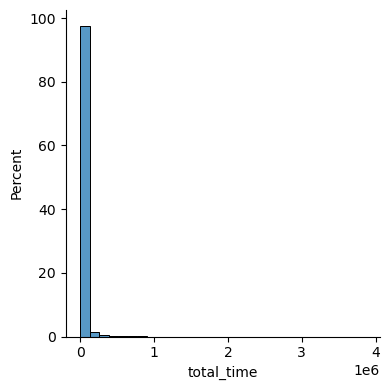

In [91]:
sns.displot(
    inputs_xdf, x="total_time", stat='percent', kind='hist', bins=30, height=4)

plt.show()

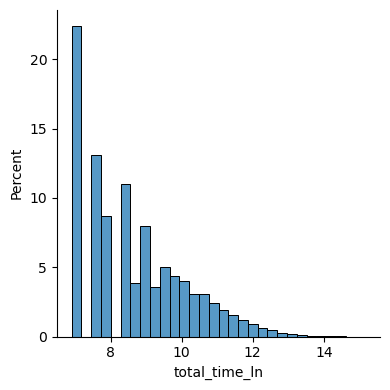

In [92]:
sns.displot(
    inputs_xdf, x="total_time_ln", stat='percent', kind='hist', bins=30, height=4)

plt.show()

sns.displot(
    inputs_xdf, x="total_time_wdz", stat='percent', kind='hist', bins=30, height=4)

plt.show()

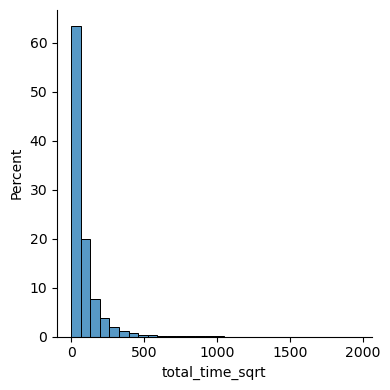

In [93]:
sns.displot(
    inputs_xdf, x="total_time_sqrt", stat='percent', kind='hist', bins=30, height=4)

plt.show()

##### `idle_time`

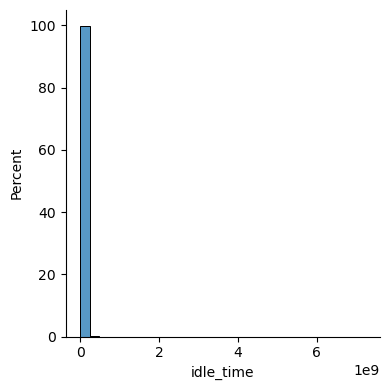

In [94]:
sns.displot(
    inputs_xdf, x="idle_time", stat='percent', kind='hist', bins=30, height=4)

plt.show()

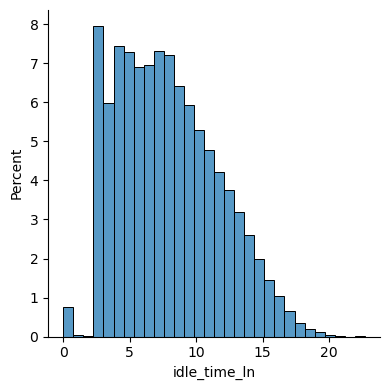

In [95]:
sns.displot(
    inputs_xdf, x="idle_time_ln", stat='percent', kind='hist', bins=30, height=4)

plt.show()

sns.displot(
    inputs_xdf, x="idle_time_wdz", stat='percent', kind='hist', bins=30, height=4)

plt.show()

##### `mouse_wheel`

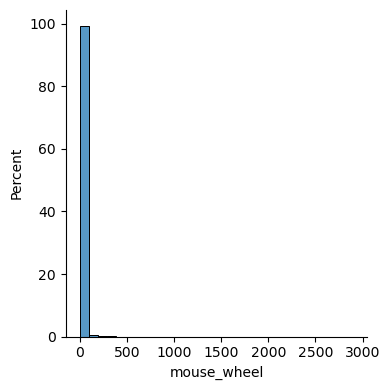

In [96]:
sns.displot(
    inputs_xdf, x="mouse_wheel", stat='percent', kind='hist', bins=30, height=4)

plt.show()

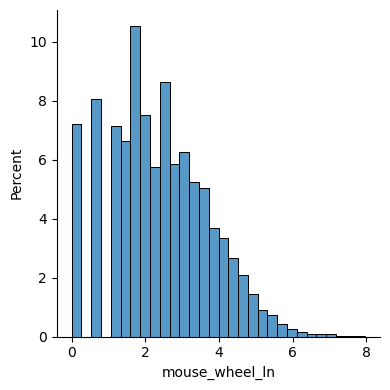

In [97]:
sns.displot(
    inputs_xdf, x="mouse_wheel_ln", stat='percent', kind='hist', bins=30, height=4)

plt.show()

sns.displot(
    inputs_xdf, x="mouse_wheel_wdz", stat='percent', kind='hist', bins=30, height=4)

plt.show()

##### `mouse_wheel_click`

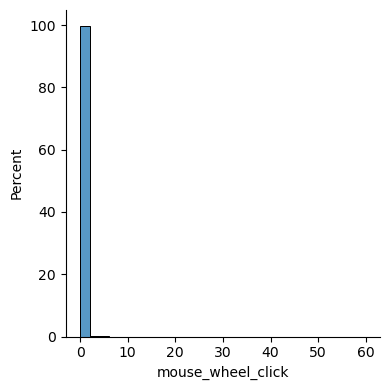

In [98]:
sns.displot(
    inputs_xdf, x="mouse_wheel_click", stat='percent', kind='hist', bins=30, height=4)

plt.show()

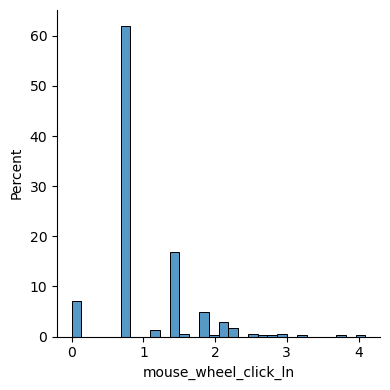

In [99]:
sns.displot(
    inputs_xdf, x="mouse_wheel_click_ln", stat='percent', kind='hist', bins=30, height=4)

plt.show()

sns.displot(
    inputs_xdf, x="mouse_wheel_click_wdz", stat='percent', kind='hist', bins=30, height=4)

plt.show()

##### `mouse_click_left`

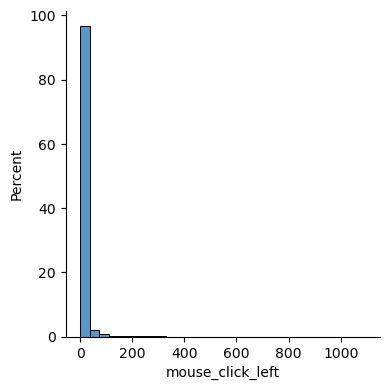

In [100]:
sns.displot(
    inputs_xdf, x="mouse_click_left", stat='percent', kind='hist', bins=30, height=4)

plt.show()

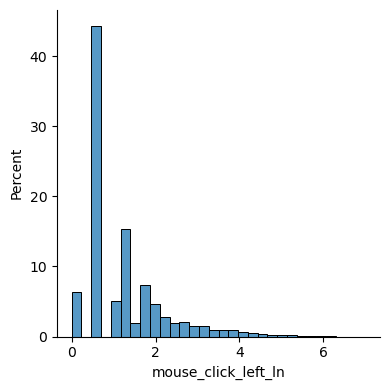

In [101]:
sns.displot(
    inputs_xdf, x="mouse_click_left_ln", stat='percent', kind='hist', bins=30, height=4)

plt.show()

sns.displot(
    inputs_xdf, x="mouse_click_left_wdz", stat='percent', kind='hist', bins=30, height=4)

plt.show()

##### `mouse_click_right`

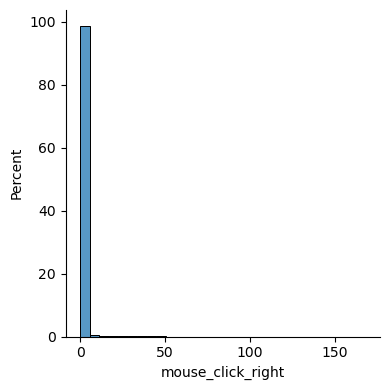

In [102]:
sns.displot(
    inputs_xdf, x="mouse_click_right", stat='percent', kind='hist', bins=30, height=4)

plt.show()

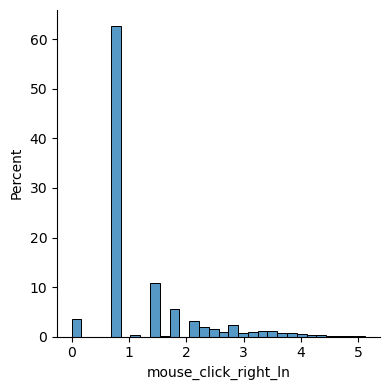

In [103]:
sns.displot(
    inputs_xdf, x="mouse_click_right_ln", stat='percent', kind='hist', bins=30, height=4)

plt.show()

sns.displot(
    inputs_xdf, x="mouse_click_right_wdz", stat='percent', kind='hist', bins=30, height=4)

plt.show()

##### `mouse_movement`

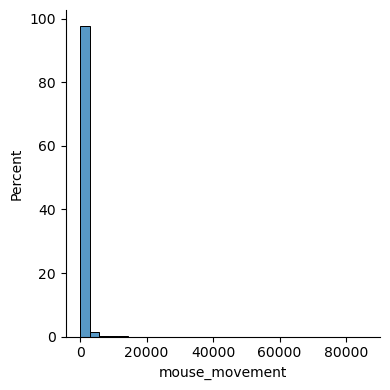

In [104]:
sns.displot(
    inputs_xdf, x="mouse_movement", stat='percent', kind='hist', bins=30, height=4)

plt.show()

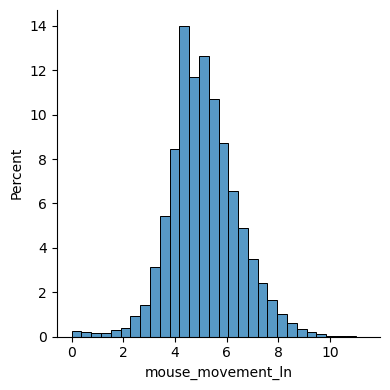

In [105]:
sns.displot(
    inputs_xdf, x="mouse_movement_ln", stat='percent', kind='hist', bins=30, height=4)

plt.show()

sns.displot(
    inputs_xdf, x="mouse_movement_wdz", stat='percent', kind='hist', bins=30, height=4)

plt.show()

##### `keystroke`

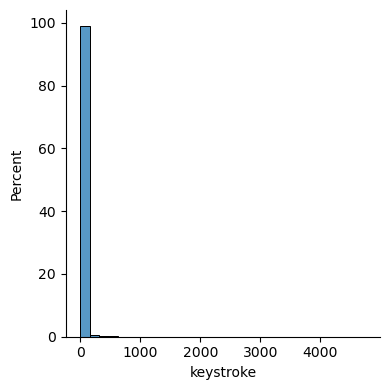

In [106]:
sns.displot(
    inputs_xdf, x="keystroke", stat='percent', kind='hist', bins=30, height=4)

plt.show()

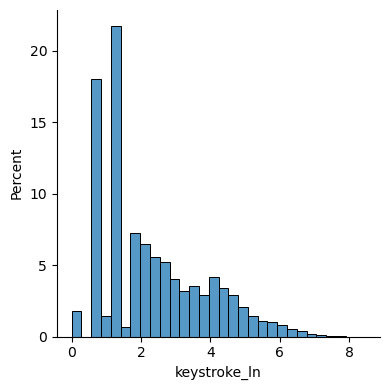

In [107]:
sns.displot(
    inputs_xdf, x="keystroke_ln", stat='percent', kind='hist', bins=30, height=4)

plt.show()

sns.displot(
    inputs_xdf, x="keystroke_wdz", stat='percent', kind='hist', bins=30, height=4)

plt.show()

In [108]:
inputs_xdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227129 entries, 0 to 227128
Data columns (total 33 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   session                 227129 non-null  object        
 1   student_id              227129 non-null  object        
 2   exercise                227129 non-null  object        
 3   activity                227129 non-null  object        
 4   activity_grp            227129 non-null  object        
 5   activity_ex             111979 non-null  object        
 6   start_time              227129 non-null  datetime64[ns]
 7   end_time                227129 non-null  datetime64[ns]
 8   total_time              227128 non-null  float64       
 9   idle_time               226971 non-null  float64       
 10  mouse_wheel             227129 non-null  int64         
 11  mouse_wheel_click       227129 non-null  int64         
 12  mouse_click_left        227129

In [109]:
inputs_xdf.columns

Index(['session', 'student_id', 'exercise', 'activity', 'activity_grp',
       'activity_ex', 'start_time', 'end_time', 'total_time', 'idle_time',
       'mouse_wheel', 'mouse_wheel_click', 'mouse_click_left',
       'mouse_click_right', 'mouse_movement', 'keystroke', 'active_time',
       'total_time_ln', 'idle_time_ln', 'mouse_wheel_ln',
       'mouse_wheel_click_ln', 'mouse_click_left_ln', 'mouse_click_right_ln',
       'mouse_movement_ln', 'keystroke_ln', 'total_time_sqrt',
       'idle_time_sqrt', 'mouse_wheel_sqrt', 'mouse_wheel_click_sqrt',
       'mouse_click_left_sqrt', 'mouse_click_right_sqrt',
       'mouse_movement_sqrt', 'keystroke_sqrt'],
      dtype='object')

In [110]:
inputs_xdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227129 entries, 0 to 227128
Data columns (total 33 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   session                 227129 non-null  object        
 1   student_id              227129 non-null  object        
 2   exercise                227129 non-null  object        
 3   activity                227129 non-null  object        
 4   activity_grp            227129 non-null  object        
 5   activity_ex             111979 non-null  object        
 6   start_time              227129 non-null  datetime64[ns]
 7   end_time                227129 non-null  datetime64[ns]
 8   total_time              227128 non-null  float64       
 9   idle_time               226971 non-null  float64       
 10  mouse_wheel             227129 non-null  int64         
 11  mouse_wheel_click       227129 non-null  int64         
 12  mouse_click_left        227129

In [111]:
df_split = np.array_split(inputs_xdf, 3)

In [112]:
pd.concat([df_split[0], df_split[1], df_split[2]], ignore_index=True, axis=0).shape

(227129, 33)

In [113]:
df_split[0].to_csv('inputs_clean_p1.csv')

In [114]:
df_split[1].to_csv('inputs_clean_p2.csv')

In [115]:
df_split[2].to_csv('inputs_clean_p3.csv')

## Outputs

#### Total point values are not provided for interim session grades...assume they are all worth the same number of points. Total points for each component of the final are in the pts_final data set.

In [116]:
interim_init.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   student_id  115 non-null    int64  
 1   session_2   115 non-null    float64
 2   session_3   115 non-null    float64
 3   session_4   115 non-null    float64
 4   session_5   115 non-null    float64
 5   session_6   115 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 5.5 KB


In [117]:
interim_init.rename(columns={"session_2": "interim_s2_score", "session_3": "interim_s3_score",  
                              "session_4": "interim_s4_score", "session_5": "interim_s5_score", 
                              "session_6": "interim_s6_score"}, inplace=True)

In [118]:
interim_init.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   student_id        115 non-null    int64  
 1   interim_s2_score  115 non-null    float64
 2   interim_s3_score  115 non-null    float64
 3   interim_s4_score  115 non-null    float64
 4   interim_s5_score  115 non-null    float64
 5   interim_s6_score  115 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 5.5 KB


In [119]:
final_init.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   student_id   62 non-null     int64  
 1   Es_1_1       62 non-null     float64
 2   Es_1_2       62 non-null     float64
 3   Es_2_1       62 non-null     float64
 4   Es_2_2       62 non-null     float64
 5   Es_3_1       62 non-null     float64
 6   Es_3_2       62 non-null     float64
 7   Es_3_3       62 non-null     float64
 8   Es_3_4       62 non-null     float64
 9   Es_3_5       62 non-null     float64
 10  Es_4_1       62 non-null     float64
 11  Es_4_2       62 non-null     float64
 12  Es_5_1       62 non-null     float64
 13  Es_5_2       62 non-null     float64
 14  Es_5_3       62 non-null     float64
 15  Es_6_1       62 non-null     float64
 16  Es_6_2       62 non-null     float64
 17  final_score  62 non-null     float64
dtypes: float64(17), int64(1)
memory usage: 8.8 KB


In [120]:
pts_final_init.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   question      17 non-null     object
 1   question_pts  17 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 400.0+ bytes


In [121]:
pts_final_init.question.unique()

array(['Es_1_1', 'Es_1_2', 'Es_2_1', 'Es_2_2', 'Es_3_1', 'Es_3_2',
       'Es_3_3', 'Es_3_4', 'Es_3_5', 'Es_4_1', 'Es_4_2', 'Es_5_1',
       'Es_5_2', 'Es_5_3', 'Es_6_1', 'Es_6_2', 'final_score'],
      dtype=object)

#### Add classification variable to indicate event 'pass_final' if composite score is greater than or equal to 70

In [122]:
final_init['pass_final'] = np.where( final_init['final_score'] >= 70, 1, 0 )